<h1>Exercice 1</h1>

    a)Nombre de termes nécessaire pour obtenir une bonne précision
   
$$\frac{1}{2^n} \leq  \varepsilon \iff  N \geq 6log(10)$$

In [33]:
6*log(10,2).n()

19.9315685693242

On peut donc en conclure que il faut que N soit supérieur a 20 pour que $\frac{1}{2^N} \leq  \varepsilon$

On verifie algorithmiquement

In [23]:
N = 0
RN = 1
eps = 10^-6

while abs(RN)>= eps:
    N += 1
    RN /= 2
    
    
N

20

$\text{on obtient bien que Rn est inferieur à }\varepsilon \text{pour n supérieur ou égale à 20}\\[1cm]
\text{b) On peut ensuite regarder vers quoi la somme converge}$

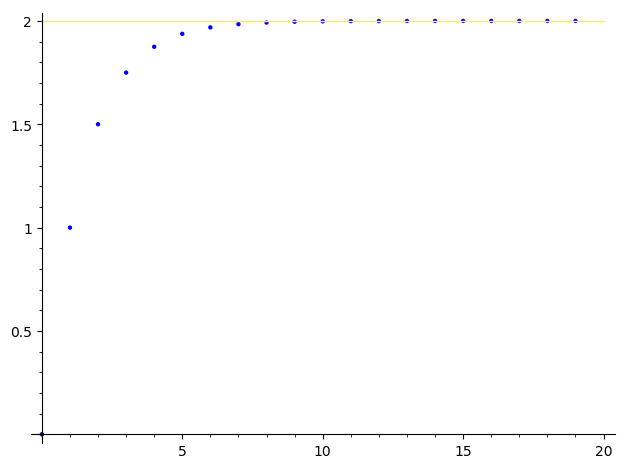

In [1]:
S = 0.  
sommes_partielles = [ S ]
for n in [0..20]:
    
    S += 1/2**n
    sommes_partielles.append(S)
    


list_plot(sommes_partielles[:20]) + plot(2, (0,20), color='yellow')

$\text{On voit que la série a sa somme qui converge vers 2.}$

<h1>Exercice 2</h1>

$\text{on veut montrer que la série alterné convergente} \sum\limits_{n\in\ N} frac{(-1)^n}{(2n)!} \text{a pour somme cos(1).}\\[1cm]
\text{a)}$

In [10]:
N = 0
Rn = 1/factorial(2*N + 2)
eps = 10^-6

while abs(Rn)>= eps:
    N += 1
    Rn = 1/factorial(2*N + 2) 
    
    
show("N= ", N, ", Rn=",numerical_approx(Rn,digits = 4),"<",eps)


'N= ' 4 ', Rn=' 2.756e-7 '<' 1/1000000

$\text{On obtient bien que Rn est inferieur a } \varepsilon \text{ pour n superieur ou egale a 4}\\[1cm]
\text{b) On peut ensuite regarder vers quoi la somme converge}$

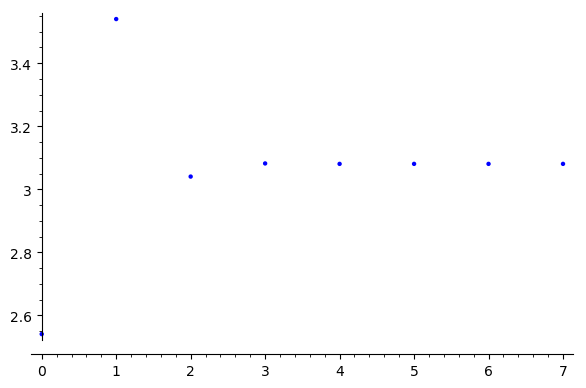

In [12]:
sommes_partielles = [ S ]
for n in [0..8]:
    
    S += (-1)^n/factorial(2*n)
    sommes_partielles.append(S)
    

list_plot(sommes_partielles[:8]) 

$\text{La somme converge vers 3,14.}$

In [13]:
S = 0. 
for n in [0..4]:
    
    S += (-1)^n/factorial(2*n)
    sommes_partielles.append(S)
    
show("S=",S)
show("cos=",cos(1.))

'S=' 0.540302579365079

'cos=' 0.540302305868140

<h1>Exercice 3</h1>

$\textbf{Exercice 3}\\
\text{On considère la série harmonique alternée} \sum\limits_{n\in N^*} \frac{(-1)^{n+1}}{n}\\
\textbf{a)}\ \ R_N=\frac{1}{N+1}$

In [2]:
%%time
N = 1
Rn = 1.
eps = 10^-6
S = 1.


while abs(Rn)>= eps:
    N += 1
    Rn = 1/(N+1) 
    S+= ((-1)^(N+1))/(N)
    
show("N=",N," ,Rn=",Rn, " ,S= ",S)

'N=' 1000000 ' ,Rn=' 1/1000001 ' ,S= ' 0.693146680560253

CPU times: user 2.72 s, sys: 0 ns, total: 2.72 s
Wall time: 2.72 s


$\text{Cette valeur correspond à ln(2)}$

$\textbf{b)}\text{ Il faut 2,72s pour calculer à une précision }\varepsilon = 10^{-6}.\\
\text{Il faut donc logiquement }10^{6}\text{ fois plus de temps pour calculer à une précision }\epsilon = 10^{-12}\text{, soit  2 720 000 secondes}.$

<h1>Exercice 4</h1>

$\textbf{Exercice 4}\\
\text{La fonction zêta de Riemann est la fonction qui associe à chaque α > 1 la somme ζ(α) de la série convergente }\\ \ \ \ \ \sum\limits_{n\in N^*} \frac{1}{n^{α}}\\
\textbf{a)}\ \ \text{En comparant le reste de la série à l'aire sous }y=\frac{1}{x^α}\text{ à partir d'une certaine abscisse, établir l'inégalité }\\
\ \ \ \ \left|ζ(α)-\sum\limits_{n=1}^N \frac{1}{n^α}\right|\le\frac{1}{α-1}.\frac{1}{N^{α-1}}\\
\text{En déduire le nombre N de termes nécessaires pour obtenir une estimation de ζ(α) à une précision de ε donnée.}$

$\text{Soit P}\rightarrow\infty :\\
\ \ \ \ \ \ \ \ \ f_α(x)=\sum\limits_{n=N+1}^P \frac{1}{n^α}\le\int_{N}^{P} \frac{1}{x^α} \mathrm{d}x\\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \sum\limits_{n=N+1}^P \frac{1}{n^α}\le\frac{1}{α-1}.\left[\frac{1}{x^{α-1}}\right]_{N}^{P}\\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \sum\limits_{n=N+1}^P \frac{1}{n^α}\le\frac{1}{α-1}.\frac{1}{N^{α-1}}\ \ \ \ \text{(car }\frac{1}{P^{α-1}}\rightarrow 0)\\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \left|R_N\right|\le\frac{1}{α-1}.\frac{1}{N^{α-1}}\\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \left|S-S_N\right|\le\frac{1}{α-1}.\frac{1}{N^{α-1}}\ \ \ \ \text{(car }\left|R_N\right|=\left|S-S_N\right|)$

In [4]:
def findN(eps, alpha):
    n = 1
    x = 1
    Rn= 1./(alpha-1)*1/(n^(alpha-1))
    S = 0.
    
    while(Rn>= eps):
        n += 1
        S += Rn
        Rn = 1./(alpha-1)*1/(n^(alpha-1))
    return [n, S]


resultat=findN(10^(-6), 2)
show("N=", resultat[0], " S=", resultat[1])


resultat=findN(10^(-12), 5)
show("N=", resultat[0], " S=", resultat[1])

'N=' 1000001 ' S=' 14.3927267228650

'N=' 708 ' S=' 0.270580808192475

$\text{b)}\ \ \ \ ζ\left(2 +\frac{5}{12}\right).\\
α=2 +\frac{5}{12}=\frac{29}{12}=2.4167 \text{ environ}\\
\text{alors:}$

In [5]:
resultat=findN(10^(-6), 2.4167)
show("N=", resultat[0], " S=", numerical_approx(resultat[1], digits=5))

'N=' 13441 ' S=' 2.0899

$\ \ \ \ ζ\left(2 +\frac{7}{12}\right).\\
α=2 +\frac{7}{12}=\frac{31}{12}=2.5833 \text{ environ}\\
\text{alors:}$

In [6]:
resultat=findN(10^(-6), 2.5833)
show("N=", resultat[0], " S=", numerical_approx(resultat[1], digits=5))

'N=' 4608 ' S=' 1.4652

$\text{c) Sauriez-vous conjecturer une formule pour la valeur exacte de ζ(2n)?}$

In [6]:
reset()
S = 0.
x = 1
S = 1.

for n in [2..1000]:
    S += 1./n^(2*n)
    
show("S=", S)

'S=' 1.06388710376242